# <center> PORTFOLIO BLOG </center>
INFO 7390 


Vignesh Murali


NUID: 001886775


## What is Alzheimer's Disease?
Alzheimer's disease is the most common cause of dementia — a group of brain disorders that cause the loss of intellectual and social skills. In Alzheimer's disease, the brain cells degenerate and die, causing a steady decline in memory and mental function.

In [154]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.nia.nih.gov/sites/default/files/inline-images/brain_slices_alzheimers_0.jpg")

## What are we trying to do?
In this blog, we are trying to explain how we can build Machine Learning classification models to detect the presence of Alzheimer's Disease using existing medical data.

Before we proceed let's define some essential concepts which are to be known.

### Supervised Learning: 
Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. 

### Classification: 
A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes. Outcomes are labels that can be applied to a dataset. For example, when filtering emails “spam” or “not spam”.

There are various classification models in Machine Learning such as Random Forests Classifier and Naive Baye's Classifier.

### Neural Networks:
Artificial neural networks (ANNs) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. 

Such systems "learn" (i.e. progressively improve performance on) tasks by considering examples, generally without task-specific programming.

A deep neural network (DNN) is an artificial neural network (ANN) with multiple hidden layers between the input and output layers.

## Let's get started!

We still start off by obtaining the dataset which we are going to use.

The dataset has been obtained from https://www.oasis-brains.org/.

- This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. 
- For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 
- 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. 
- Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### The first step is to import all the required packages

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn.preprocessing import normalize, StandardScaler
from scipy.stats import multivariate_normal
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation

### Next we clean the dataset of null values and unwanted columns

In [189]:
df=pd.read_csv('oasis_longitudinal.csv')
df2=df
df.isnull().sum()
df = df.fillna(method='ffill')
df.isnull().sum()
df = df.drop('Hand',1)


Now our data is ready for preprocessing and analysis!

It is important to remove irrelevant columns from our dataset because they could affect the performance of our model.

### Preprocessing
We map categorical values to integer values and we standardize our data using StandardScaler() because some classification models perform better with standardized data.

In [190]:
X = df.drop('Group', axis=1)
X = X.drop(['Subject ID','MRI ID','M/F','SES','Visit'], axis=1)
y = df['Group']

size_mapping={'Demented':1,'Nondemented':2,'Converted':3,'M':4,'F':5}

df2['Group'] = df2['Group'].map(size_mapping)

from sklearn.preprocessing import normalize, StandardScaler
sc_x = StandardScaler()
X2 = sc_x.fit_transform(X)
size_mapping={'Demented':1,'Nondemented':2,'Converted':3,'M':4,'F':5}
df2['Group'] = df2['Group'].map(size_mapping)

### Split data into a Training Set and a Test Set

The training set contains a known output and the model learns on this data in order to be generalized to other data later on.

We have the test dataset (or subset) in order to test our model’s prediction on this subset.



In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=1)

### Selecting best features for classification
All kinds of tree methods calculate their splits by mathematically determining which split will most effectively help distinguish the classes. 

This is how the Random Forest method ranks it's features based on their importances depending on which feature allows the best split.

           0         1
0  63.501291       CDR
1  12.377521      MMSE
2   8.972169  MR Delay
3   4.064768      nWBV
4   4.039277       Age
5   2.810986       ASF
6   2.342095      eTIV
7   1.891893      EDUC


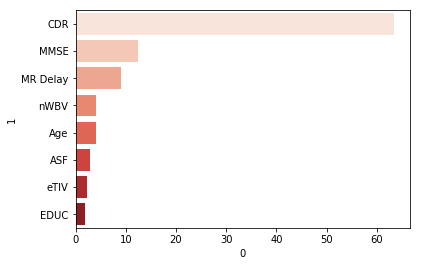

In [192]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=1,max_features=5)


random_forest.fit(X_train, y_train)

importances=100*random_forest.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
features_pd = pd.DataFrame(sorted_feature_importance)
print(features_pd)

sns.barplot(x=0, y=1, data=features_pd,palette='Reds');
plt.show()

Clinical Dementia Rating (CDR) seems to be the most important feature.


The Clinical Dementia Rating or CDR is a numeric scale used to quantify the severity of symptoms of dementia.

CDR:
- 0 No dementia
- 0.5 Slightly Dementia
- 1 Demented
- 2 Severely Demented


We may eliminate the 3 lowest features to improve the accuracy of our model.


## Classification of data
Now as we have cleaned, pre-processed, split and selected features for our dataset, we may finally apply the classification models and view the results produced.

### **We start off with the Support Vector Classifier.**

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. 

First we create the model with desired parameters.

In [193]:
Image(url= "http://38.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg")

In [194]:
from sklearn.svm import SVC
supvc = SVC(kernel='linear',C=2)

We attempt to fit our training data into the model we just created

In [195]:
supvc.fit(X_train2,y_train2)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that the model has sucessfully fit the data, we may predict new values using the test data.

Then using the accuray_score module from Sci-Kit learn's metrics set, we may view how well the model performed

In [196]:
y_predict = supvc.predict(X_test2)
svcscore=accuracy_score(y_test2,y_predict)*100
print('Accuracy of Support vector classifier is ')
print(100*accuracy_score(y_test2,y_predict))

Accuracy of Support vector classifier is 
92.5531914893617


Let us construct the confusion matrix to view the exact number of accurate predictions

In [197]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True Alzheimers','True converted']
)

,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,2,1,6
True Alzheimers,0,35,0
True converted,0,0,50


Observations:
- Extremely low accuracy of 56% when using the RBF kernel.
- High computation time on poly kernel & 90% accuracy.
- Highest accuracy obtained on the linear kernel with 92.55%.
- Accuracy slightly increases when penalty parameter C is set to 2.



We have sucessfully classified patients into "Demented" or "Nondemented" with Support Vector Classifier with an accuracy of 92.55%!

##### Similarly, this process can be repeated with several other classification models provided by Sci-Kit Learn to perform classification.

You can choose from the following classification models and discover the most accurate one for this cause.
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### **Using Random Forests Classifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

In [198]:
Image(url= "http://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/ggff5544hh.png")


In [199]:
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
rfscore = 100*accuracy_score(y_test, y_predict)
print('Accuracy of Random Forests Classifier Accuracy is ')
print(100*accuracy_score(y_test,y_predict))
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True Alzheimers','True converted']
)

Accuracy of Random Forests Classifier Accuracy is 
92.5531914893617


,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,3,1,5
True Alzheimers,1,34,0
True converted,0,0,50


Observations:
- The highest accuracy was attained when max_features was set to 5.
- When 5 features are considered for the best split, we obtain the greatest accuracy in this model (92.55%)
- Standardization does not make a difference to the accuracy.


### **Using K Nearest Neighbors**

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). 

In [200]:
Image(url= "http://adataanalyst.com/wp-content/uploads/2016/07/kNN-1.png")



In [201]:
from sklearn.neighbors import KNeighborsClassifier
nneighbor = KNeighborsClassifier(n_neighbors=8,metric='euclidean')
nneighbor.fit(X_train2, y_train2)
y_predict = nneighbor.predict(X_test2)
knscore = 100*accuracy_score(y_test2, y_predict)
print('Accuracy of K Nearest Neighbors Classifier is ')
print(100*accuracy_score(y_test2,y_predict))
pd.DataFrame(
    confusion_matrix(y_test2, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True Alzheimers','True converted']
)

Accuracy of K Nearest Neighbors Classifier is 
88.29787234042553


,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,0,3,6
True Alzheimers,1,34,0
True converted,1,0,49


Observations:
- Accuracy plateaus after using 8 neighbors.
- Accuracy remains the same with all distance measures ( minkowski, manhattan, euclidean ).


### **Using Decision Tree Classifier**

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

In [202]:
Image(url= "http://dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png")



In [203]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_features=5)
dectree.fit(X_train, y_train)
y_predict = dectree.predict(X_test)
decscore=100*accuracy_score(y_test, y_predict)
print('Accuracy of Decision Tree Classifier is ')
print(100*accuracy_score(y_test,y_predict))
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True Alzheimers','True converted']
)

Accuracy of Decision Tree Classifier is 
77.6595744680851


,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,3,1,5
True Alzheimers,8,27,0
True converted,7,0,43


Observations:
- Max_features is selected as 5, this means that when 5 features are selected for the best split, accuracy is the highest.

### **Using Naive Baye's Classifier**

Naive Bayes is a kind of classifier which uses the Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class.  The class with the highest probability is considered as the most likely class.

In [235]:
Image(url= "http://www.saedsayad.com/images/Bayes_rule.png")


In [236]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict = gnb.predict(X_test)
nbscore = 100*accuracy_score(y_test, y_predict)
print('Accuracy of Naive Bayes Classifier is ')
print(100*accuracy_score(y_test,y_predict))
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted alzheimers','Predicted Converted'],
    index=['True Healthy', 'True alzheimers','True converted']
)

Accuracy of Naive Bayes Classifier is 
90.42553191489363


,Predicted Healthy,Predicted alzheimers,Predicted Converted
True Healthy,2,1,6
True alzheimers,2,33,0
True converted,0,0,50


Observations:
- Parameters have not been tuned because the only parameter available for tuning is priors (Prior probabilities of the class).
- It is best to leave priors at 'None' because the priors will be adjusted automatically based on the data.

### **Using Ada Boost Classifier**

Ada-boost classifier combines weak classifier algorithm to form strong classifier. A single algorithm may classify the objects poorly. But if we combine multiple classifiers with selection of training set at every iteration and assigning right amount of weight in final voting, we can have good accuracy score for overall classifier.



In [237]:
Image(url= "https://www.researchgate.net/profile/Brendan_Marsh3/publication/306054843/figure/fig3/AS:393884896120846@1470920885933/Training-of-an-AdaBoost-classifier-The-first-classifier-trains-on-unweighted-data-then.png")



In [238]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(algorithm='SAMME')
abc.fit(X_train2,y_train2)
y_predict = abc.predict(X_test2)
abcscore=accuracy_score(y_test2,y_predict)*100
print('Accuracy of ADA Boost classifier is ')
print(100*accuracy_score(y_test2,y_predict))
pd.DataFrame(
    confusion_matrix(y_test2, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True alzheimers','True converted']
)

Accuracy of ADA Boost classifier is 
90.42553191489363


,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,0,3,6
True alzheimers,0,35,0
True converted,0,0,50


Observations:
- Yields higher accuracy when the algorithm used is SAMME and not the default SAMME.R.
- SAMME is a boosting algorithm which works better for multiclass classification, SAMME.R works is conventionally used for binary classification problems.
- Accuracy greatly increases after using standardised data(From 50% to 90%).

### Using a Multilayered Perceptron Classifier

Multilayer perceptron classifier is a classifier based on the feedforward artificial neural network. MLPC consists of multiple layers of nodes. Each layer is fully connected to the next layer in the network. Nodes in the input layer represent the input data. All other nodes map inputs to outputs by a linear combination of the inputs with the node’s weights w and bias b and applying an activation function.

We are using 3 hidden layers of nodes. 

The solver is used for weight optimization.

In [239]:
Image(url= "https://www.researchgate.net/profile/Mouhammd_Alkasassbeh/publication/309592737/figure/fig2/AS:423712664100865@1478032379613/MultiLayer-Perceptron-MLP-sturcture-334-MultiLayer-Perceptron-Classifier-MultiLayer.jpg")



In [240]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500,solver='lbfgs',hidden_layer_sizes=(10,30,20),activation='tanh')
mlp.fit(X_train2,y_train2)
y_predict = mlp.predict(X_test2)
mlpscore = 100*accuracy_score(y_test2,y_predict)
print(mlpscore)
from sklearn.metrics import classification_report,confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test2, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True alzheimers','True converted']
)

85.1063829787234


,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,3,1,5
True alzheimers,3,32,0
True converted,5,0,45


Observations:
- Performance greatly increased from 50% to 81.23% after using scaled data.
- Accuracy remains unaffected on changing activation functions.
- According to scikit learn documentation, the solver 'lbfgs' is more appropriate for smaller datasets compared to other solvers such as 'adam'.

###  Using a Feed Forward Deep Learning Neural Network

[This Code was Adapted From: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/ Author: Jason Brownlee]

The feedforward neural network was the first and simplest type of artificial neural network devised. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network.

In [241]:
Image(url= "https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Architecture/images/feedforward.jpg")



-  Multi-class labels need to be converted to binary labels(belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method. At prediction time, one assigns the class for which the corresponding model gave the greatest confidence.

In [242]:

lb = LabelBinarizer()
y_train3 =lb.fit_transform(y_train2)


- The Keras library provides a convenient wrapper for deep learning models to be used as classification or regression estimators in scikit-learn. 
- The KerasClassifier class in Keras take an argument build_fn which is the name of the function to call to get your model. You must define a function that defines your model, compiles it and returns it. 

In [243]:
def baseline_model():
	classifier = Sequential()

# Adding the input layer and the first hidden layer
	classifier.add(Dense(activation = 'relu',  input_dim = 8, units = 8, kernel_initializer = 'uniform'))
# Adding the second hidden layer
	classifier.add(Dense( activation = 'relu', units = 15, kernel_initializer = 'uniform'))
# Adding the third hidden layer


# Adding the output layer
	classifier.add(Dense(activation = 'sigmoid', units = 3, kernel_initializer = 'uniform' ))

# Compiling the ANN
	classifier.compile(optimizer = 'adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set
	return classifier

- In the example below, it is called "baseline_model". We pass this function name to the KerasClassifier.


In [244]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=5, verbose=0)

- The model is automatically bundled up and passed on to the fit() function which is called internally by the KerasClassifier class.

In [245]:
estimator.fit(X_train2, y_train2)

In [246]:
y_predict = estimator.predict(X_test2)

In [247]:
ffdnscore = 100*accuracy_score(y_test2,y_predict)
ffdnscore

92.5531914893617

In [248]:
pd.DataFrame(
    confusion_matrix(y_test2, y_predict),
    columns=['Predicted Healthy', 'Predicted Alzheimers','Predicted Converted'],
    index=['True Healthy', 'True alzheimers','True converted']
)

,Predicted Healthy,Predicted Alzheimers,Predicted Converted
True Healthy,2,1,6
True alzheimers,0,35,0
True converted,0,0,50


Observations:
- Using the Adamax optimizer we obtain the highest accuracy.
- We start with the input layer, followed by two hidden layers with relu activation functions.
- The output layer is added and the model is compiled.

## Comparing our classification models
We have run all five classifiers and obtained the accuracies for each, we will attempt to visaulize the acccuracies to determine the best possible classifier for predicting Alzheimer's disease.

    Accuracy Classifier
2  77.659574        DEC
6  79.787234        MLP
3  88.297872        KNN
1  90.425532         NB
5  90.425532        ABC
7  90.425532       FFDN
0  92.553191        SVC
4  92.553191         RF


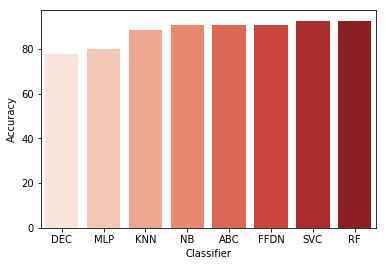

In [234]:
scorearray = [svcscore,nbscore,decscore,knscore,rfscore,abcscore,mlpscore,ffdnscore]
score_arr = [{'Classifier':'SVC','Accuracy':svcscore},
           {'Classifier':'NB','Accuracy':nbscore},
            {'Classifier':'DEC','Accuracy':decscore},
            {'Classifier':'KNN','Accuracy':knscore},
            {'Classifier':'RF','Accuracy':rfscore}
            ,{'Classifier':'ABC','Accuracy':abcscore},
            {'Classifier':'MLP','Accuracy':mlpscore},
            {'Classifier':'FFDN','Accuracy':ffdnscore}]
score_df = pd.DataFrame(score_arr)

score_df = score_df.sort_values('Accuracy')
print(score_df)

sns.barplot(x="Classifier", y="Accuracy", data=score_df,palette='Reds');
plt.show()

### Observations

- We can hence clearly observe that the best classifier is the Support Vector Classifier & Random Forest Classifier with 92.55% accuracy.

- The deep learning Multilayer Perceptron with 3 layers yields 87% accuracy, this could possibly be due to the small size of the dataset resulting in overfitting of the model.

- The Deep Learning Network Using Keras Classifier performs better than a tri-layered MLP but the conventional classifiers outperform this network.

- The other classifiers' performances were average with the Decision Tree Classifier being the worst performer with 77.12% accuracy.

- Since Neural Networks are stochastic in nature, they produce random results every time.

- Conventional Machine Learning classifiers perform better than Neural Network models. This could possibly be due to the small size of the dataset which in turn leads to the model overfitting the data. Regularization and data augmentation can be used to solve this problem.

### Thank you!
I hope this tutorial was helpful, if you have any questions please e-mail me at murali.v@husky.neu.edu